# **Проект №1. Исследование пользователей Яндекс.Музыки** <a class="tocSkip">

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1">Описание проекта</a></span></li><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-2">Импорт библиотек</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-3">Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1">Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-4">Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Стиль-заголовков" data-toc-modified-id="Стиль-заголовков-4.1">Стиль заголовков</a></span></li><li><span><a href="#Пропуски-значений" data-toc-modified-id="Пропуски-значений-4.2">Пропуски значений</a></span></li><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-4.3">Дубликаты</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5">Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Сравнение-поведения-пользователей-двух-столиц" data-toc-modified-id="Сравнение-поведения-пользователей-двух-столиц-5.1">Сравнение поведения пользователей двух столиц</a></span></li><li><span><a href="#Музыка-в-начале-и-в-конце-недели" data-toc-modified-id="Музыка-в-начале-и-в-конце-недели-5.2">Музыка в начале и в конце недели</a></span></li><li><span><a href="#Жанровые-предпочтения-в-Москве-и-Петербурге" data-toc-modified-id="Жанровые-предпочтения-в-Москве-и-Петербурге-5.3">Жанровые предпочтения в Москве и Петербурге</a></span></li></ul></li><li><span><a href="#Итоги-исследования" data-toc-modified-id="Итоги-исследования-6">Итоги исследования</a></span></li></ul></div>

## Описание проекта

Сравнение Москвы и Петербурга окружено мифами. Например:
 * Москва — мегаполис, подчинённый жёсткому ритму рабочей недели;
 * Петербург — культурная столица, со своими вкусами.

На данных Яндекс.Музыки мы сравним поведение пользователей двух столиц.

**Цель исследования** — проверить три гипотезы:
1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города. 
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.

**Ход исследования**

Данные о поведении пользователей мы получим из файла `yandex_music_project.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Мы проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки мы поищем возможность исправить самые критичные ошибки данных.

##  Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

pd.set_option('display.float_format', '{:.2f}'.format)
plt.style.use('seaborn-whitegrid')

## Обзор данных

In [2]:
try:
    df = pd.read_csv('yandex_music_project.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/yandex_music_project.csv')

Посмотрим на  первые десять строк таблицы:

In [3]:
df.head()

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday


Получим общую информацию о таблице:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


Итак, в таблице семь столбцов. Тип данных во всех столбцах — `object`.

Согласно документации к данным:
* `userID` — идентификатор пользователя;
* `Track` — название трека;  
* `artist` — имя исполнителя;
* `genre` — название жанра;
* `City` — город пользователя;
* `time` — время начала прослушивания;
* `Day` — день недели.

В названиях колонок видны три нарушения стиля:
1. Строчные буквы сочетаются с прописными.
2. Встречаются пробелы.
3. Слова не разделены пробелом.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

### Вывод

В каждой строке таблицы — данные о прослушанном треке. Часть колонок описывает саму композицию: название, исполнителя и жанр. Остальные данные рассказывают о пользователе: из какого он города, когда он слушал музыку. 

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

## Предобработка данных

Начнем предобработку с заголовков таблицы

### Стиль заголовков
Выведем на экран названия столбцов:

In [5]:
df.columns

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')

Переведем названия в стандартный змеиный регистр

In [6]:
df = df.rename(columns={'  userID':'user_id', 
                           'Track':'track', 
                        '  City  ':'city', 
                             'Day':'day'})

Проверим результат. Для этого ещё раз выведите на экран названия столбцов:

In [7]:
df.columns

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')

### Пропуски значений
Сначала посчитаем, сколько в таблице пропущенных значений:

In [8]:
df.isna().sum().sort_values(ascending=False)

artist     7203
track      1231
genre      1198
user_id       0
city          0
time          0
day           0
dtype: int64

Не все пропущенные значения влияют на исследование. Так в `track` и `artist` пропуски не важны для вашей работы. Достаточно заменить их явными обозначениями.

Но пропуски в `genre` могут помешать сравнению музыкальных вкусов в Москве и Санкт-Петербурге. На практике было бы правильно установить причину пропусков и восстановить данные. Такой возможности нет в учебном проекте. Придётся:
* заполнить и эти пропуски явными обозначениями,
* оценить, насколько они повредят расчётам. 

Заменим пропущенные значения в столбцах `track`, `artist` и `genre` на строку `'unknown'`. Для этого создадим список `columns_to_replace`, переберем его элементы циклом `for` и для каждого столбца выполните замену пропущенных значений:

In [9]:
# перебор названий столбцов в цикле и замена пропущенных значений на 'unknown'
columns_to_replace = ['track', 'artist', 'genre']
for name in columns_to_replace:
    df[name] = df[name].fillna('unknown')

Убедимся, что в таблице не осталось пропусков. Для этого ещё раз посчитаем пропущенные значения.

In [10]:
df.isna().sum()

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64

### Дубликаты
Посчитаем явные дубликаты в таблице одной командой:

In [11]:
df.duplicated().sum()

3826

Вызовем специальный метод `pandas`, чтобы удалить явные дубликаты:

In [12]:
df = df.drop_duplicates().reset_index(drop=True)

Ещё раз посчитаем явные дубликаты в таблице:

In [13]:
# проверка на отсутствие дубликатов
df.duplicated().sum()

0

Теперь избавимся от неявных дубликатов в колонке `genre`. Например, название одного и того же жанра может быть записано немного по-разному. Такие ошибки тоже повлияют на результат исследования.

Выведите на экран список уникальных названий жанров, отсортированный в алфавитном порядке.

In [14]:
df['genre'].sort_values().unique()

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

Просмотрим список и найдем неявные дубликаты названия `hiphop`. Это могут быть названия с ошибками или альтернативные названия того же жанра.

Мы можем увидеть следующие неявные дубликаты:
* *hip*,
* *hop*,
* *hip-hop*.

Чтобы очистить от них таблицу, напишем функцию `replace_wrong_genres()` с двумя параметрами: 
* `wrong_genres` — список дубликатов,
* `correct_genre` — строка с правильным значением.

Функция должна исправить колонку `genre` в таблице `df`: заменить каждое значение из списка `wrong_genres` на значение из `correct_genre`.

In [15]:
# Функция для замены неявных дубликатов
def replace_wrong_genres(wrong_genres, correct_genre):
    for elem in wrong_genres:
        wrong_name_count = df[df['genre']==elem]['genre'].count() 
        print(f'Начальное число {elem} в таблице {wrong_name_count}') 
        df['genre'] = df['genre'].replace(elem, correct_genre)                  
        wrong_name_count = df[df['genre']==elem]['genre'].count()
        print(f'Число {elem} в таблице после обработки: {wrong_name_count}', end='\n\n')

Вызовем `replace_wrong_genres()` и передадим ей такие аргументы, чтобы она устранила неявные дубликаты: вместо `hip`, `hop` и `hip-hop` в таблице должно быть значение `hiphop`:

In [16]:
wrong_genres_list = ['hip', 'hop', 'hip-hop']
replace_wrong_genres (wrong_genres_list, 'hiphop') 

Начальное число hip в таблице 2975
Число hip в таблице после обработки: 0

Начальное число hop в таблице 1
Число hop в таблице после обработки: 0

Начальное число hip-hop в таблице 1
Число hip-hop в таблице после обработки: 0



Проверим, что заменили неправильные названия:

*   hip
*   hop
*   hip-hop

Выведем отсортированный список уникальных значений столбца `genre`:

In [17]:
# Проверка на неявные дубликаты
df['genre'].sort_values().unique()

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

**Выводы**

Предобработка обнаружила три проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- дубликаты — явные и неявные.

Мы исправили заголовки, чтобы упростить работу с таблицей. Без дубликатов исследование станет более точным.

Пропущенные значения мы заменили на `'unknown'`. Ещё предстоит увидеть, не повредят ли исследованию пропуски в колонке `genre`.

Теперь можно перейти к проверке гипотез. 

## Проверка гипотез

### Сравнение поведения пользователей двух столиц

Первая гипотеза утверждает, что пользователи по-разному слушают музыку в Москве и Санкт-Петербурге. Проверим это предположение по данным о трёх днях недели — понедельнике, среде и пятнице. Для этого:

* Разделим пользователей Москвы и Санкт-Петербурга
* Сравним, сколько треков послушала каждая группа пользователей в понедельник, среду и пятницу.


Для тренировки сначала выполним каждый из расчётов по отдельности. 

Оценим активность пользователей в каждом городе. Сгруппируем данные по городу и посчитаем прослушивания в каждой группе.

In [18]:
# Подсчёт прослушиваний в каждом городе
df.groupby('city')['track'].count()

city
Moscow              42741
Saint-Petersburg    18512
Name: track, dtype: int64

В Москве прослушиваний больше, чем в Петербурге. Из этого не следует, что московские пользователи чаще слушают музыку. Просто самих пользователей в Москве больше.

In [19]:
# Проверка числа пользователей
df.groupby('city')['user_id'].nunique()

city
Moscow              29358
Saint-Petersburg    12423
Name: user_id, dtype: int64

Для лучшего представления о пользователях лучше вычислить среднее число прослушанных треков на 1 человека

In [20]:
df.groupby('city')['track'].count() / df.groupby('city')['user_id'].nunique()

city
Moscow             1.46
Saint-Petersburg   1.49
dtype: float64

Дополнительные 2 ячейки кода более наглядно показывают отношение числа пользователей, что дает лучшее понимание данных, а так же можно сделать вывод, что пользователи из разных городов в среднем одинаково активны при прослушивании музыки через сервис Яндекс.Музыка.

Теперь сгруппируем данные по дню недели и подсчитайте прослушивания в понедельник, среду и пятницу. При этом учитывая, что в данных есть информация только о прослушиваниях только за эти дни.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61253 entries, 0 to 61252
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  61253 non-null  object
 1   track    61253 non-null  object
 2   artist   61253 non-null  object
 3   genre    61253 non-null  object
 4   city     61253 non-null  object
 5   time     61253 non-null  object
 6   day      61253 non-null  object
dtypes: object(7)
memory usage: 3.3+ MB


city              day      
Moscow            Friday       15945
                  Monday       15740
                  Wednesday    11056
Saint-Petersburg  Friday        5895
                  Monday        5614
                  Wednesday     7003
Name: user_id, dtype: int64


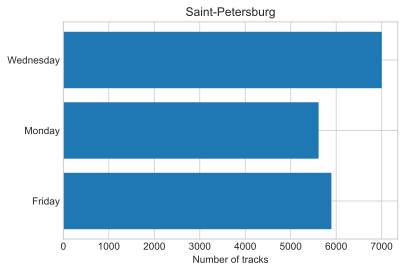

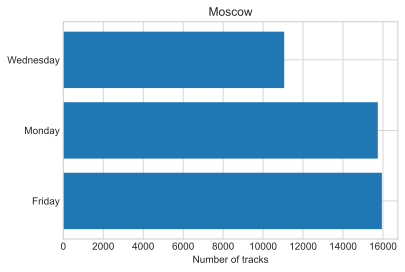

In [22]:
group_city_day = df.groupby(['city', 'day']).apply(lambda x: x.sort_values(['day'],ascending=False).count())['user_id']
print(group_city_day)            
city_name = df['city'].unique() # Отображение общей таблицы

for elem in city_name:               
    filter_city = group_city_day[elem]                          
    fig, ax = plt.subplots()                                    
    ax.barh(filter_city.index, filter_city.values)
    ax.set(xlabel='Number of tracks', title=elem)

In [23]:
df.groupby('day')['track'].count()

day
Friday       21840
Monday       21354
Wednesday    18059
Name: track, dtype: int64

В среднем пользователи из двух городов менее активны по средам. Но картина может измениться, если рассмотреть каждый город в отдельности.

Теперь напишем функцию, которая объединит два эти расчёта.

Создадим функцию `number_tracks()`, которая посчитает прослушивания для заданного дня и города. Ей понадобятся два параметра:
* день недели,
* название города.

В функции сохраним в переменную строки исходной таблицы, у которых значение:
  * в колонке `day` равно параметру `day`,
  * в колонке `city` равно параметру `city`.

Для этого применим последовательную фильтрацию с логической индексацией.

Затем посчитаем значения в столбце `user_id` получившейся таблицы. Результат сохраним в новую переменную. Вернем эту переменную из функции.

In [24]:
def number_tracks(day, city):
    
    track_list = df[(df['day']==day) & (df['city']==city)]
    track_list_count = track_list['user_id'].count()
    return track_list_count

Вызовем `number_tracks()` шесть раз, меняя значение параметров — так, чтобы получить данные для каждого города в каждый из трёх дней.

In [25]:
# количество прослушиваний в Москве по понедельникам
number_tracks('Monday', 'Moscow')

15740

In [26]:
# количество прослушиваний в Санкт-Петербурге по понедельникам
number_tracks('Monday', 'Saint-Petersburg')

5614

In [27]:
# количество прослушиваний в Москве по средам
number_tracks('Wednesday', 'Moscow')

11056

In [28]:
# количество прослушиваний в Санкт-Петербурге по средам
number_tracks('Wednesday', 'Saint-Petersburg')

7003

In [29]:
# количество прослушиваний в Москве по пятницам
number_tracks('Friday', 'Moscow')

15945

In [30]:
# количество прослушиваний в Санкт-Петербурге по пятницам
number_tracks('Friday', 'Saint-Petersburg')

5895

Создайдим c помощью конструктора `pd.DataFrame` таблицу, где:
* названия колонок — `['city', 'monday', 'wednesday', 'friday']`;
* данные — результаты, которые вы получили с помощью `number_tracks`.

In [31]:
# Таблица с результатами
group_city_day.unstack()[['Monday', 'Wednesday', 'Friday']]

day,Monday,Wednesday,Friday
city,,,
Moscow,15740,11056,15945
Saint-Petersburg,5614,7003,5895


**Выводы**

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

Значит, данные говорят в пользу первой гипотезы.

### Музыка в начале и в конце недели

Согласно второй гипотезе, утром в понедельник в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.

Сохраним таблицы с данными в две переменные:
* по Москве — в `moscow_general`;
* по Санкт-Петербургу — в `spb_general`.

In [32]:
moscow_general = df[df['city']=='Moscow']
spb_general = df[df['city']=='Saint-Petersburg']

Создадим функцию `genre_weekday()` с четырьмя параметрами:
* таблица (датафрейм) с данными,
* день недели,
* начальная временная метка в формате 'hh:mm', 
* последняя временная метка в формате 'hh:mm'.

Функция должна вернуть информацию о топ-10 жанров тех треков, которые прослушивали в указанный день, в промежутке между двумя отметками времени.

In [33]:
def genre_weekday(table, day, time1, time2):
    
    genre_df = table[(table['day']==day) & (table['time']>time1) & (table['time']<time2)]
    genre_df_count = genre_df.groupby('genre')['user_id'].count()
    genre_df_sorted = genre_df_count.sort_values(ascending = False)
    return genre_df_sorted.head(10)

Cравним результаты функции `genre_weekday()` для Москвы и Санкт-Петербурга в понедельник утром (с 7:00 до 11:00) и в пятницу вечером (с 17:00 до 23:00):

In [34]:
genre_weekday(moscow_general, 'Monday', '07:00', '11:00')

genre
pop            781
dance          549
electronic     480
rock           474
hiphop         286
ruspop         186
world          181
rusrap         175
alternative    164
unknown        161
Name: user_id, dtype: int64

In [35]:
genre_weekday(spb_general, 'Monday', '07:00', '11:00')

genre
pop            218
dance          182
rock           162
electronic     147
hiphop          80
ruspop          64
alternative     58
rusrap          55
jazz            44
classical       40
Name: user_id, dtype: int64

In [36]:
genre_weekday(moscow_general, 'Friday', '18:00', '22:00')

genre
pop            710
rock           508
dance          489
electronic     478
hiphop         273
world          206
ruspop         169
alternative    163
classical      160
rusrap         139
Name: user_id, dtype: int64

In [37]:
genre_weekday(spb_general, 'Friday', '18:00', '22:00')

genre
pop            254
electronic     216
rock           215
dance          207
hiphop          93
alternative     63
jazz            60
rusrap          59
classical       59
world           54
Name: user_id, dtype: int64

**Выводы**

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное отличие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение `'unknown'` заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования.

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах.

### Жанровые предпочтения в Москве и Петербурге

Гипотеза: Петербург — столица рэпа, музыку этого жанра там слушают чаще, чем в Москве.  А Москва — город контрастов, в котором, тем не менее, преобладает поп-музыка.

Сгруппируем таблицу `moscow_general` по жанру и посчитайте прослушивания треков каждого жанра методом `count()`. Затем отсортируем результат в порядке убывания и сохраните его в таблице `moscow_genres`.

In [38]:
moscow_genres = moscow_general.groupby('genre')['user_id'].count().sort_values(ascending = False)

Выведем на экран первые десять строк `moscow_genres`:

In [39]:
moscow_genres.head(10)

genre
pop            5892
dance          4435
rock           3965
electronic     3786
hiphop         2096
classical      1616
world          1432
alternative    1379
ruspop         1372
rusrap         1161
Name: user_id, dtype: int64

In [40]:
spb_genres = spb_general.groupby('genre')['user_id'].count().sort_values(ascending = False)
spb_genres.head(10)

genre
pop            2431
dance          1932
rock           1879
electronic     1736
hiphop          960
alternative     649
classical       646
rusrap          564
ruspop          538
world           515
Name: user_id, dtype: int64

**Выводы**

Гипотеза частично подтвердилась:
* Поп-музыка — самый популярный жанр в Москве, как и предполагала гипотеза. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Вопреки ожиданиям, рэп одинаково популярен в Москве и Петербурге. 


## Итоги исследования

Мы проверили три гипотезы и установили:

1. День недели по-разному влияет на активность пользователей в Москве и Петербурге. 

Первая гипотеза полностью подтвердилась.

2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам:
* в Москве слушают музыку жанра “world”,
* в Петербурге — джаз и классику.

Таким образом, вторая гипотеза подтвердилась лишь отчасти. Этот результат мог оказаться иным, если бы не пропуски в данных.

3. Во вкусах пользователей Москвы и Петербурга больше общего чем различий. Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают московские.

Третья гипотеза не подтвердилась. Если различия в предпочтениях и существуют, на основной массе пользователей они незаметны.